# Alex Glover Final Project ML

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [82]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [40]:
data = pd.read_csv("dataset.csv")
aa=data[data['Class']==1]
bb=data[data['Class']==0]
bb=bb.sample(len(aa))
data=pd.concat([aa,bb])

#Exploratory data analysis 

#### Five top records of data

In [41]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


#### Five last records of data

In [42]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31785,36516,1.149523,-0.711810,-0.198244,0.029826,1.279629,4.416378,-1.310352,1.190590,1.418352,...,-0.354967,-0.768897,-0.031456,1.057159,0.517714,0.313963,0.032215,0.021158,34.33,0
264328,161376,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,2.49,0
175557,122388,1.925515,0.301887,-0.561146,3.678203,0.615088,1.134870,-0.252903,0.191704,-0.534900,...,0.071172,0.503636,-0.072918,-1.072191,0.241449,0.179955,-0.003328,-0.066880,0.00,0
213109,139114,-0.063933,0.857416,-0.196125,-0.485057,0.051237,-0.297995,-0.104851,0.639229,0.028363,...,-0.119473,-0.505052,0.399981,0.611121,-1.414712,-0.104032,-0.011414,0.074380,10.90,0
68049,52807,-0.713297,-0.014113,2.033992,-1.407218,-0.659189,-0.617349,0.249537,-0.025712,-0.977895,...,-0.408139,-0.652937,-0.207914,0.428231,0.344296,1.001907,-0.035839,0.049712,31.10,0


#### Coloumns/features in data

In [43]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Length of data

In [44]:
print('lenght of data is', len(data))

lenght of data is 984


#### Shape of data

In [45]:
data.shape

(984, 31)

#### Data information

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 541 to 68049
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    int64  
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22

#### Checking Null values / missing values

In [47]:
np.sum(data.isnull().any(axis=1))

0

#### Counts of missing values in each column

In [48]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Rows and columns in the dataset

In [49]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   31


In [50]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   984


#### Data Description

In [51]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86654.706301,-2.334913,1.792136,-3.462853,2.274341,-1.614282,-0.665014,-2.769261,0.318172,-1.287829,...,0.363853,0.020855,-0.021925,-0.024555,0.020182,0.021813,0.096043,0.041293,107.771738,0.500000
std,48200.417854,5.506863,3.666831,6.238789,3.175032,4.191851,1.776035,5.863340,4.851938,2.308015,...,2.791499,1.165226,1.149654,0.558566,0.650609,0.470932,1.000086,0.407849,251.481973,0.500254
min,406.000000,-30.552380,-10.012767,-31.103685,-4.163734,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.197828,-4.781606,-1.154110,-7.263482,-1.869290,0.000000,0.000000
25%,45531.000000,-2.732232,-0.156375,-5.113334,-0.070474,-1.795412,-1.534514,-3.044451,-0.159122,-2.294075,...,-0.153674,-0.532773,-0.233434,-0.377314,-0.300566,-0.290123,-0.050764,-0.051109,1.180000,0.000000
50%,77234.500000,-0.719042,0.901876,-1.340393,1.252830,-0.475557,-0.618123,-0.603661,0.188375,-0.697541,...,0.167283,0.037433,-0.031591,0.015381,0.048428,-0.026232,0.060316,0.039172,17.690000,0.500000
75%,133339.500000,1.055008,2.735735,0.432455,4.229802,0.412969,0.081080,0.240211,0.886583,0.158964,...,0.640500,0.598677,0.180455,0.392654,0.385510,0.319680,0.455730,0.208837,99.990000,1.000000
max,172267.000000,2.301943,22.057729,3.071862,12.114672,11.095089,8.794068,14.011559,20.007208,5.279445,...,27.202839,8.361985,5.466230,1.181559,2.208209,2.745261,3.052358,1.779364,3416.790000,1.000000


### Taking Input and and output

In [52]:
X=data.drop(columns=['Class'])
y=data['Class']

### Original data dimension

In [53]:
X.shape

(984, 30)

### Scalling the Values of Features

In [54]:
X= MinMaxScaler().fit_transform(X)

#PCA Dimension Reduction

### PCA

In [55]:
PCA_ = PCA(n_components=20)
PCA_X = PCA_.fit_transform(X)

### Data Dimensions now

In [56]:
PCA_X.shape

(984, 20)

In [57]:
#split of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(PCA_X, y, test_size=0.30, random_state=2)

# Random Forest

In [58]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=2)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=2, random_state=11)

In [59]:
y_pred = Ran_For.predict(X_test)
rn1=f1_score(y_test, y_pred)
print('F1 score= {:.5f}'.format(f1_score(y_test, y_pred)))

F1 score= 0.92473


### ROC CURVE

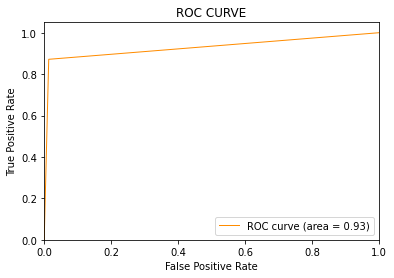

In [60]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##LDA Dimension Reduction

### LDA

In [61]:
LDA_=LinearDiscriminantAnalysis(n_components=1)
LDA_X = LDA_.fit_transform(X,y)

### Data Dimensions now

In [62]:
LDA_X.shape

(984, 1)

In [63]:
#split of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(LDA_X, y, test_size=0.30, random_state=2)

# Random Forest

In [64]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=2)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=2, random_state=11)

In [65]:
y_pred = Ran_For.predict(X_test)
rn2=f1_score(y_test, y_pred)
print('F1 score= {:.5f}'.format(f1_score(y_test, y_pred)))

F1 score= 0.94949


### ROC CURVE

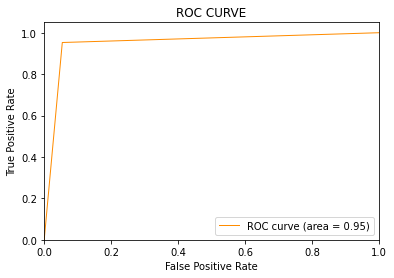

In [66]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##TSNE Dimension Reduction

### TSNE

In [74]:
TSNE_=X_TSNE = TSNE(n_components=3)
TSNE_X = TSNE_.fit_transform(X)

### Data Dimensions now

In [75]:
TSNE_X.shape

(984, 3)

In [76]:
#split of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(LDA_X, y, test_size=0.30, random_state=2)

# Random Forest

In [77]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=2)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=2, random_state=11)

In [78]:
y_pred = Ran_For.predict(X_test)
rn3=f1_score(y_test, y_pred)
print('F1 score= {:.5f}'.format(f1_score(y_test, y_pred)))

F1 score= 0.94949


### ROC CURVE

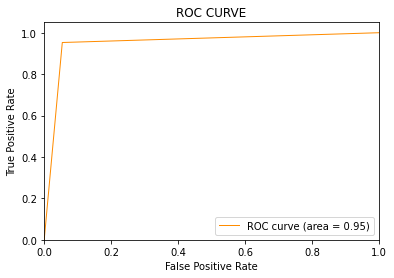

In [79]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Comparison of all algorithms Results

In [80]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["PCA Based score", round(rn1,4)])
x.add_row(["LDA Based score", round(rn2,4)])
x.add_row(["TSNE Based score", round(rn3,4)])

print(x)
print('\n')

NameError: name 'PrettyTable' is not defined

# ROC Curve for Models

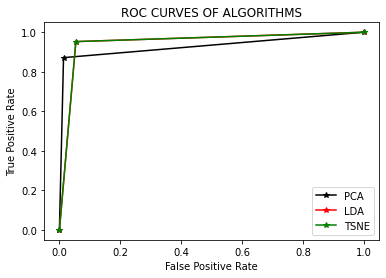

In [81]:
plt.plot(fpr1, tpr1, marker='*', label='PCA', color = 'black')
plt.plot(fpr2, tpr2, marker='*', label='LDA', color = 'Red')
plt.plot(fpr3, tpr3, marker='*', label='TSNE', color = 'green')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

# I applied three dimension reduction techniuqes. LDA and TSNE based dimension reduction techniques performed well but the training time TSNE is more reliable in this case. LDA is the better and fast method for dimensionalty reduction. Thank you for such a great year!